# **Matter Solubility**

# **Load Dataset**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')

# **Data Prepping**

## **Separating X and y data**

In [ ]:
y = df['logS']
X = df.drop('logS', axis=1)

## **Splitting data for training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# **Model building**

## **Linear Regression**

### Training the model

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### Applying model for prediction

In [ ]:
y_lr_model_test_pred = lr_model.predict(X_test)
y_lr_model_train_pred = lr_model.predict(X_train)

### Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_model_train_mse = mean_squared_error(y_train, y_lr_model_train_pred)
lr_model_train_r2 = r2_score(y_train, y_lr_model_train_pred)

lr_model_test_mse = mean_squared_error(y_test, y_lr_model_test_pred)
lr_model_test_r2 = r2_score(y_test, y_lr_model_test_pred)

In [ ]:
lr_results = pd.DataFrame(['Linear Regression', lr_model_test_mse, lr_model_test_r2, lr_model_train_mse,lr_model_train_r2]).transpose()
lr_results.columns = ['Model', 'Test MSE', 'Test R2', 'Train MSE', 'Train R2']
lr_results

,Model,Test MSE,Test R2,Train MSE,Train R2
0,Linear Regression,1.020695,0.789162,1.007536,0.764505


## **Random Forest**

### Training the model


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth=2, random_state=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying model for prediction

In [ ]:
y_rf_model_test_pred = rf_model.predict(X_test)
y_rf_model_train_pred = rf_model.predict(X_train)

### Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_model_train_mse = mean_squared_error(y_train, y_rf_model_train_pred)
rf_model_train_r2 = r2_score(y_train, y_rf_model_train_pred)

rf_model_test_mse = mean_squared_error(y_test, y_rf_model_test_pred)
rf_model_test_r2 = r2_score(y_test, y_rf_model_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Linear Regression', rf_model_test_mse, rf_model_test_r2, rf_model_train_mse, rf_model_train_r2]).transpose()
rf_results.columns = ['Model', 'Test MSE', 'Test R2', 'Train MSE', 'Train R2']
rf_results

,Model,Test MSE,Test R2,Train MSE,Train R2
0,Linear Regression,1.407688,0.709223,1.028228,0.759669


## **Model Comparison**

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Model,Test MSE,Test R2,Train MSE,Train R2
0,Linear Regression,1.020695,0.789162,1.007536,0.764505
1,Linear Regression,1.407688,0.709223,1.028228,0.759669


# **Data Model Visualization**

Text(0.5, 0, 'Experiment logS')

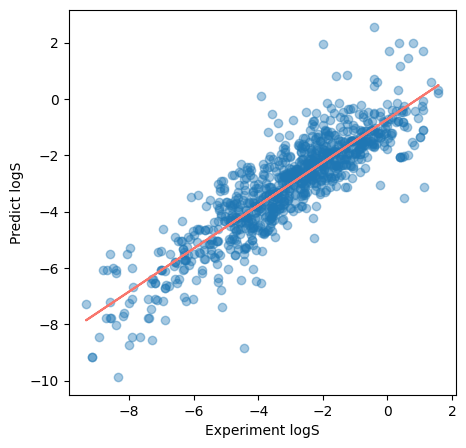

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_model_train_pred, alpha=0.4)

z = np.polyfit(y_train, y_lr_model_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict logS')
plt.xlabel('Experiment logS')